# Week 08 Notes

## Machine Learning for Computer Vision

Review the [slides](./slides.pdf) for this week to get some notes.

## Picking important features

- Features are what impact the predictions of the model
- It is like columns in a table
- It is important to drop the features that do not impact the prediction. For Eg) A Person's name won't be able to help us predict whether they are likely to have heart disease or not.

In [144]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np 
import seaborn as sb
import matplotlib as plt

In [84]:
# Fetch the dataset from a CSV file using pandas
df = pd.read_csv("./titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
# Exploring the columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [86]:
# Exploring the datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [87]:
# Exploring the quantity of the data
df.shape

(891, 12)

In [88]:
# Checking out the null values in the database
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [89]:
# How many null values for each feature
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [90]:
# What is the percentage of missing values in Cabin
(687/891)*100

# Now, should we replace or remove this feature

77.10437710437711

In [91]:
df["Cabin"].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [92]:
df.shape

(891, 12)

In [93]:
# We dont wanna drop the whole thing since then we won't have enough data.
# Therefore, we will just drop the 'Cabin' Column
df = df.drop("Cabin",axis = 1)

In [94]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [95]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [96]:
# For age, we can just replace the null values with the mean of all ages
df["Age"].mean()

np.float64(29.69911764705882)

In [97]:
# Round value to the nearest whole number
mean_age = round(df["Age"].mean(),0)
mean_age

np.float64(30.0)

In [98]:
# Used to inspect the 177 rows that had missing age values before they were filled with the mean age value
df.loc[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [99]:
# Replace all the NaN values with the mean of the ages
df["Age"] = df["Age"].fillna(value = mean_age)

In [100]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [101]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [102]:
df.loc[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [103]:
# We can drop this since there are only two of these
df = df.dropna()

In [104]:
df.shape

(889, 11)

In [105]:
# Now, we do not have any null values across the whole database
df.isnull().sum().sum()

np.int64(0)

In [106]:
df.shape

(889, 11)

In [107]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [108]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [109]:
# Let us remove the values that do not impact the final prediction at all
df = df.drop(["Name",'Ticket','PassengerId'] , axis = 1)

In [110]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [111]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

### What is a Categorical Type?

A **categorical type** is a variable that can take on one of a limited, fixed number of possible values, representing categories or labels. These values typically do not have any inherent numerical meaning or order. For example:

- **Nominal categories**: Values have no order (e.g., colors like "red," "blue," "green").
- **Ordinal categories**: Values have a meaningful order but no consistent spacing (e.g., "low," "medium," "high").

In datasets, categorical types are usually represented as:

- **Strings or labels**: E.g., "dog," "cat," "bird."
- **Encoded integers**: E.g., 1 for "dog," 2 for "cat," 3 for "bird" (this is common in pre-processed data).

In [112]:
# Since, all our data should be numbers at the end of the day,
# We will change the 'Sex' category to a category type
df["Sex"] = df["Sex"].astype("category")

In [113]:
df["Sex"].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False, categories_dtype=object)

In [114]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [115]:
# We convert 'Embarked' to a categorical datatype as well
df["Embarked"] = df["Embarked"].astype("category")

In [116]:
df.dtypes

Survived       int64
Pclass         int64
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

In [117]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


## Separating X and y

`X` would be the matrix of our features and `y` would be our target column.

In [118]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

X, y

(     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
 0         3    male  22.0      1      0   7.2500        S
 1         1  female  38.0      1      0  71.2833        C
 2         3  female  26.0      0      0   7.9250        S
 3         1  female  35.0      1      0  53.1000        S
 4         3    male  35.0      0      0   8.0500        S
 ..      ...     ...   ...    ...    ...      ...      ...
 886       2    male  27.0      0      0  13.0000        S
 887       1  female  19.0      0      0  30.0000        S
 888       3  female  30.0      1      2  23.4500        S
 889       1    male  26.0      0      0  30.0000        C
 890       3    male  32.0      0      0   7.7500        Q
 
 [889 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 889, dtype: int64)

## Normalizing our Dataset

In the context of machine learning, normalizing a dataset refers to transforming the data into a format that makes it suitable for processing by a machine learning model. This process often involves ensuring all feature values are on a similar scale or range, which can help models converge faster and perform better.

### Why Can't Machine Learning Models Work Directly with Categorical Data?

Most machine learning models work with numerical data because they perform mathematical operations like distance calculations or matrix multiplications. Directly using categorical values (e.g., "dog," "cat") can lead to undefined or nonsensical results. Even if encoded as integers (e.g., 1, 2, 3), the model may misinterpret the numerical difference (e.g., "dog" - "cat" = 1) as meaningful, which it isn't.

### Normalizing Data: Handling Categorical Types

To prepare categorical data for a machine learning model, we typically perform **encoding**, which converts the categories into numerical representations. Common techniques include:

1. **One-Hot Encoding**:
   
   - Converts each category into a binary vector.
   - For example, "dog," "cat," "bird" would become:
     ```
     dog:  [1, 0, 0]
     cat:  [0, 1, 0]
     bird: [0, 0, 1]
     ```

2. **Label Encoding**:
   
   - Assigns each category a unique integer.
   - E.g., "dog" → 1, "cat" → 2, "bird" → 3.
   - This is simpler but risks implying an ordinal relationship where none exists.

3. **Target Encoding (Mean Encoding)**:
   
   - Replaces each category with the mean of the target variable for that category.
   - Useful for handling categorical variables in regression tasks.

### Normalizing Numerical Features

For numerical data, normalization involves scaling the features to a standard range, such as:

- **Min-Max Scaling**: Rescales values to a range, typically [0, 1].
- **Standardization (Z-score scaling)**: Centers data around 0 with a standard deviation of 1.

Both steps — encoding categorical types and normalizing numerical data — are crucial to ensure the dataset is fully numerical and in a format conducive to model training.

##  Min-Max Scaling:

In this technique of data normalization, a linear transformation is performed on the original data. The minimum and maximum value from data are fetched and each value is replaced according to the following formula.

$$
x = (x - min)/(max - min)
$$

In [119]:
a = [1,2,3]
b = [11,12,13]

In [120]:
p = (13 - 11)/(13-11)
p

1.0

#### Final Result

- a = [0,0.5,1]
- b = [0,0.5,1]

In [121]:
# Now, let us normalize our own data
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [122]:
X.dtypes

Pclass         int64
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

In [123]:
# Drop the categorical columns
X = X.drop(["Sex", "Embarked"] ,axis =1)

In [124]:
X.head(2)

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833


In [125]:
scaler = MinMaxScaler()

In [126]:
scaler.fit_transform(X)

array([[1.        , 0.27117366, 0.125     , 0.        , 0.01415106],
       [0.        , 0.4722292 , 0.125     , 0.        , 0.13913574],
       [1.        , 0.32143755, 0.        , 0.        , 0.01546857],
       ...,
       [1.        , 0.37170143, 0.125     , 0.33333333, 0.04577135],
       [0.        , 0.32143755, 0.        , 0.        , 0.0585561 ],
       [1.        , 0.39683338, 0.        , 0.        , 0.01512699]],
      shape=(889, 5))

In [127]:
pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.271174,0.125,0.000000,0.014151
1,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,0.321438,0.000,0.000000,0.015469
3,0.0,0.434531,0.125,0.000000,0.103644
4,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...
884,0.5,0.334004,0.000,0.000000,0.025374
885,0.0,0.233476,0.000,0.000000,0.058556
886,1.0,0.371701,0.125,0.333333,0.045771
887,0.0,0.321438,0.000,0.000000,0.058556


In [128]:
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [129]:
X_scaled.head(20)

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.271174,0.125,0.000000,0.014151
1,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,0.321438,0.000,0.000000,0.015469
3,0.0,0.434531,0.125,0.000000,0.103644
4,1.0,0.434531,0.000,0.000000,0.015713
5,1.0,0.371701,0.000,0.000000,0.016510
6,0.0,0.673285,0.000,0.000000,0.101229
7,1.0,0.019854,0.375,0.166667,0.041136
8,1.0,0.334004,0.000,0.333333,0.021731
9,0.5,0.170646,0.125,0.000000,0.058694


In [130]:
y.head(20)

0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    1
Name: Survived, dtype: int64

In [131]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,29.713352,12.969135,0.42,22.0000,30.0000,35.0,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292


In [132]:
X.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Pclass,889.0,2.3,0.8,1.0,2.0,3.0,3.0,3.0
Age,889.0,29.7,13.0,0.4,22.0,30.0,35.0,80.0
SibSp,889.0,0.5,1.1,0.0,0.0,0.0,1.0,8.0
Parch,889.0,0.4,0.8,0.0,0.0,0.0,0.0,6.0
Fare,889.0,32.1,49.7,0.0,7.9,14.5,31.0,512.3


In [133]:
(889*20)/100

177.8

## Training our Machine Learning Model

Now that our data is normalized, we can finally move on to training our own machine learning model using Scikit Learn.

In [134]:
# Create a training and testing split
# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [135]:
X_train.shape[0]

711

In [136]:
y_train.shape[0]

711

In [137]:
KNN_model = KNeighborsClassifier()

In [138]:
model = KNN_model.fit(X_train, y_train)
model

KNeighborsClassifier()

In [139]:
pred_test = model.predict(X_test)
pred_test

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [140]:
y_test

127    1
355    0
698    0
538    0
851    0
      ..
616    0
732    0
42     0
180    0
124    0
Name: Survived, Length: 178, dtype: int64

## Evaluating the Performance of our model

In [141]:
accuracy_score_knn = round(accuracy_score(y_test, pred_test) * 100.0)
accuracy_score_knn

64

### Confusion Matrix

A **confusion matrix** is a tool used to evaluate the performance of a classification model. It compares the predicted labels from the model with the actual labels, showing how many predictions were correct and how many were incorrect for each class. The matrix typically consists of four key values:

1. **True Positives (TP)**: The number of positive instances correctly predicted as positive.
2. **False Positives (FP)**: The number of negative instances incorrectly predicted as positive.
3. **True Negatives (TN)**: The number of negative instances correctly predicted as negative.
4. **False Negatives (FN)**: The number of positive instances incorrectly predicted as negative.

The confusion matrix is often represented as a 2x2 matrix for binary classification, like this:

$$
\begin{bmatrix}
TP & FP \\
FN & TN
\end{bmatrix}
$$

Now, let's look at the matrix we got below:

$$
\begin{bmatrix}
88 & 31 \\
33 & 26
\end{bmatrix}
$$

**In this case:**

- **True Positives (TP)** = 88: These are the instances where the model correctly predicted the positive class.
- **False Positives (FP)** = 31: These are the instances where the model incorrectly predicted the positive class when it should have predicted negative.
- **False Negatives (FN)** = 33: These are the instances where the model incorrectly predicted the negative class when it should have predicted positive.
- **True Negatives (TN)** = 26: These are the instances where the model correctly predicted the negative class.

### How to interpret this matrix:

- The **model made 88 correct predictions** for the positive class and **31 incorrect predictions** for the positive class (predicting positive when it should have been negative).
- The **model made 33 incorrect predictions** for the negative class (predicting negative when it should have been positive), and **26 correct predictions** for the negative class.

### Performance Metrics Derived from the Confusion Matrix:
From this confusion matrix, we can calculate several key performance metrics:

1. **Accuracy**: The proportion of correct predictions (both true positives and true negatives) out of all predictions.
   
   $$
   \text{Accuracy} = \frac{TP + TN}{TP + FP + TN + FN} = \frac{88 + 26}{88 + 31 + 33 + 26} = \frac{114}{178} \approx 0.64
   $$

   So the model has an accuracy of **64%**.

2. **Precision**: The proportion of predicted positives that were actually positive.
   
   $$
   \text{Precision} = \frac{TP}{TP + FP} = \frac{88}{88 + 31} = \frac{88}{119} \approx 0.74
   $$

   So, the precision of the model is **74%**.

3. **Recall (Sensitivity)**: The proportion of actual positives that were correctly identified.
   
   $$
   \text{Recall} = \frac{TP}{TP + FN} = \frac{88}{88 + 33} = \frac{88}{121} \approx 0.73
   $$

   So, the recall of the model is **73%**.

4. **F1-Score**: The harmonic mean of precision and recall, useful when there is a class imbalance.
   
   $$
   \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.74 \times 0.73}{0.74 + 0.73} \approx 0.73
   $$

**Analogy to Remember Precision vs Recall**

- **Precision =** "Of the people I caught, how many were truly guilty?"
- **Recall =** "Of the criminals out there, how many did I catch?"

### Summary:

- The confusion matrix shows that the model is somewhat accurate but has a notable number of false positives (31) and false negatives (33).
- The **accuracy** of 64% shows the overall correct prediction rate.
- **Precision** and **recall** give further insight into how well the model performs in terms of positive class predictions.

In [143]:
cf_matrix_knn = confusion_matrix(y_test, pred_test)
cf_matrix_knn

array([[88, 31],
       [33, 26]])

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

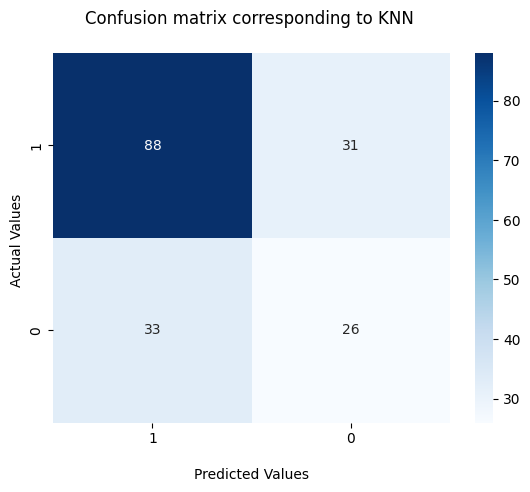

In [147]:
ax = sb.heatmap(cf_matrix_knn, annot=True, fmt="d", cmap="Blues")
ax.set_title("Confusion matrix corresponding to KNN \n");
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### Type I Error (False Positive)

- **Definition:** A Type I error occurs when the null hypothesis (\(H_0\)) is rejected when it is actually true.
- **Implication:** You conclude there is an effect or a difference when there is none.
- **Significance Level (\(\alpha\)):** The probability of committing a Type I error is denoted by \(\alpha\), often set at 0.05 (5%).
- **Example:** 
  - In a medical test, a Type I error would mean diagnosing a patient with a disease they do not have.
  - In a legal case, it’s like convicting an innocent person.


### **Type II Error (False Negative):**
- **Definition:** A Type II error occurs when the null hypothesis (\(H_0\)) is not rejected when it is actually false.
- **Implication:** You fail to detect an effect or difference when one actually exists.
- **Probability (\(\beta\)):** The probability of committing a Type II error is denoted by \(\beta\). The complement, \(1-\beta\), is the **power** of the test.
- **Example:** 
  - In a medical test, a Type II error would mean failing to diagnose a patient who actually has the disease.
  - In a legal case, it’s like letting a guilty person go free.


## Trying different models

Since the accuracy of our K Nearest Neighbours model wasn't good enough, we will try different models now.

In [79]:
LR_model = LogisticRegression()
model = LR_model.fit(X_train, y_train)
predict_logistic=model.predict(X_test)

In [80]:
predict_logistic

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [81]:
accuracy_score_LogisticRegression = round(accuracy_score(y_test, predict_logistic) * 100.0)
accuracy_score_LogisticRegression

70

Turns out the the Logistic Regression model is better for this case compared to KNN